# Concept
People live longer in countries with a higher GDP per capita. No high income countries have really short life expectancy, and no low income countries have very long life expectancy. 

Still, there is a huge difference in life expectancy between countries on the same income level. 
Most people live in Middle Income countries where difference in lifespan is huge between countries; depending on how income is distributed and how it is used.

# Source

The best statistics you’ve never seen, Hans Rolsing (https://www.gapminder.org/)

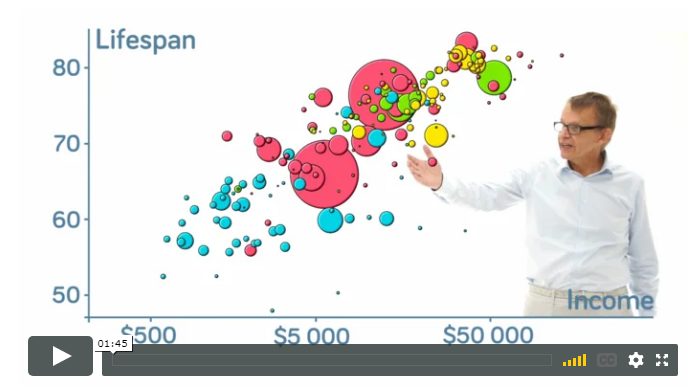


In [1]:
#Packages needed
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import pandas as pd
init_notebook_mode(connected=True)

In [2]:
#Get Data
file = r'c:\users\mshaalan\documents\gapminderDataFiveYear.csv'
dataset = pd.read_csv(file)

In [3]:
dataset.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [4]:
#Get List of Con
continents = []
for continent in dataset['continent']:
    if continent not in continents:
        continents.append(continent)
#continents

In [5]:
dataset['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [6]:
#Create Figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [30, 85], 'title': 'Life Expectancy'}
figure['layout']['yaxis'] = {'title': 'GDP per Capita', 'type': 'log'}
figure['layout']['hovermode'] = 'closest'


# Basic Chart for a given Year

In [7]:
#Prep Data
figure['data']=[]
year = 2002
for continent in continents:
    dataset_by_year = dataset[dataset['year'] == year]
    dataset_by_year_and_cont = dataset_by_year[dataset_by_year['continent'] == continent]
    data_dict = {
        'x': list(dataset_by_year_and_cont['lifeExp']),
        'y': list(dataset_by_year_and_cont['gdpPercap']),
        'mode': 'markers',
        'text': list(dataset_by_year_and_cont['country']),
        'marker': {
            'sizemode': 'area',
            'sizeref': 200000,
            'size': list(dataset_by_year_and_cont['pop'])
        },
        'name': continent
    }
    figure['data'].append(data_dict)

figure['layout']['title']=str(year)
iplot(figure)


In [8]:
# List of Years to Animate
years = ['1952', '1962', '1967', '1972', '1977', '1982', '1987', '1992', '1997', '2002', '2007']

In [9]:
# Lets Add animation buttons and slider 
figure['layout']['title']=''   

figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 100, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

In [10]:
# make frames
for year in years:
    frame = {'data': [], 'name': str(year)}
    for continent in continents:
        dataset_by_year = dataset[dataset['year'] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[dataset_by_year['continent'] == continent]

        data_dict = {
            'x': list(dataset_by_year_and_cont['lifeExp']),
            'y': list(dataset_by_year_and_cont['gdpPercap']),
            'mode': 'markers',
            'text': list(dataset_by_year_and_cont['country']),
            'marker': {
                'sizemode': 'area',
                'sizeref': 200000,
                'size': list(dataset_by_year_and_cont['pop'])
            },
            'name': continent
        }
        frame['data'].append(data_dict)
         
    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
   
    sliders_dict['steps'].append(slider_step)

# Animated Statistics 

In [11]:
figure['layout']['sliders'] = [sliders_dict]
iplot(figure)